In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ratings/desafio_ratings.csv
/kaggle/input/details/desafio_details.csv





## Importando as bibliotecas que serão utilizadas

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim

## Lendo e filtrando os arquivos csv

In [224]:
details = pd.read_csv("/kaggle/input/details/desafio_details.csv", encoding='latin-1', sep=';')
ratings = pd.read_csv("/kaggle/input/ratings/desafio_ratings.csv", encoding='latin-1', sep=';')


In [225]:
# Remove features desnecessárias para análise
details_filtrado = details.drop(columns=['Unnamed: 0'])
ratings_filtrado = ratings.drop(columns=['Unnamed: 0'])

# Droping data que possui quantidade insignificante de missing values
ratings_filtrado1 = ratings_filtrado.dropna(subset=['Total'])


In [226]:
imoveis = pd.merge(details_filtrado, ratings_filtrado, on='hotel_id')   #Juntando os dois arquivos csv

## Ordernando as cidades de forma crescente pelo número de listings

In [227]:
listings = imoveis['city_name'].value_counts().reset_index()      #Conta o número de listings de cada cidade nos Dados
listings.columns = ['city_name', 'listings']                      #Tabela com a cidade e o numero de listings
listings = listings.sort_values(by='listings', ascending=False)   #Deixando em ordem crescente

print(listings.head(10))


            city_name  listings
0       Florianópolis       762
1             Goiânia       138
2           Bombinhas        65
3             Ubatuba        35
4  Balneário Camboriú        35
5          Anitápolis        27
6    Campos do Jordão        24
7            Imbituba        23
8             Itapema        22
9        Porto Alegre        19


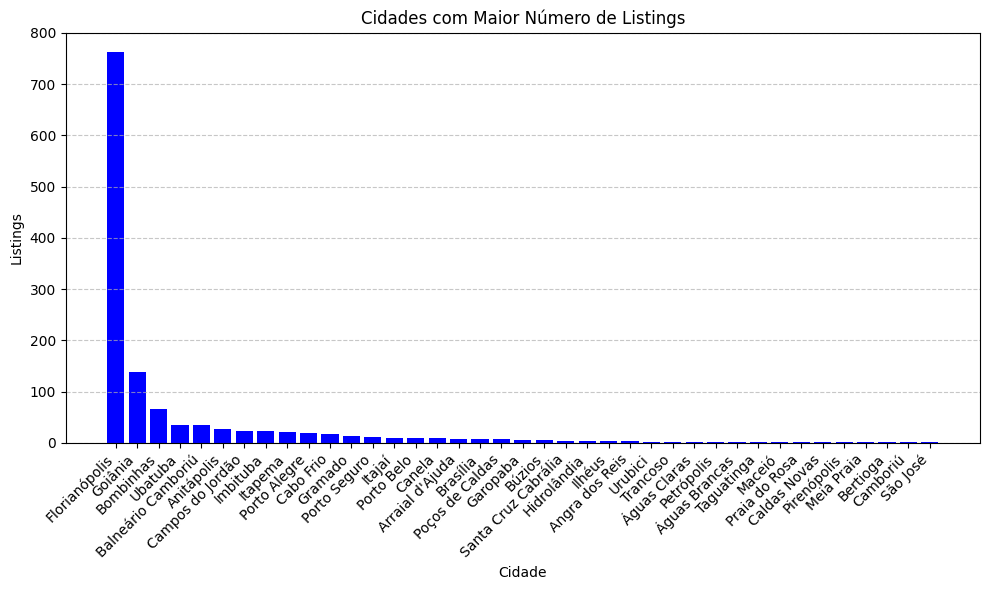

In [228]:
#Grafico com as top10 cidades com maior numero de listings

plt.figure(figsize = (10,6))
plt.bar(listings['city_name'], listings['listings'], color='blue')
plt.title('Cidades com Maior Número de Listings')
plt.xlabel('Cidade')
plt.ylabel('Listings')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Ordene as cidades em ordem decrescente de metros quadrados

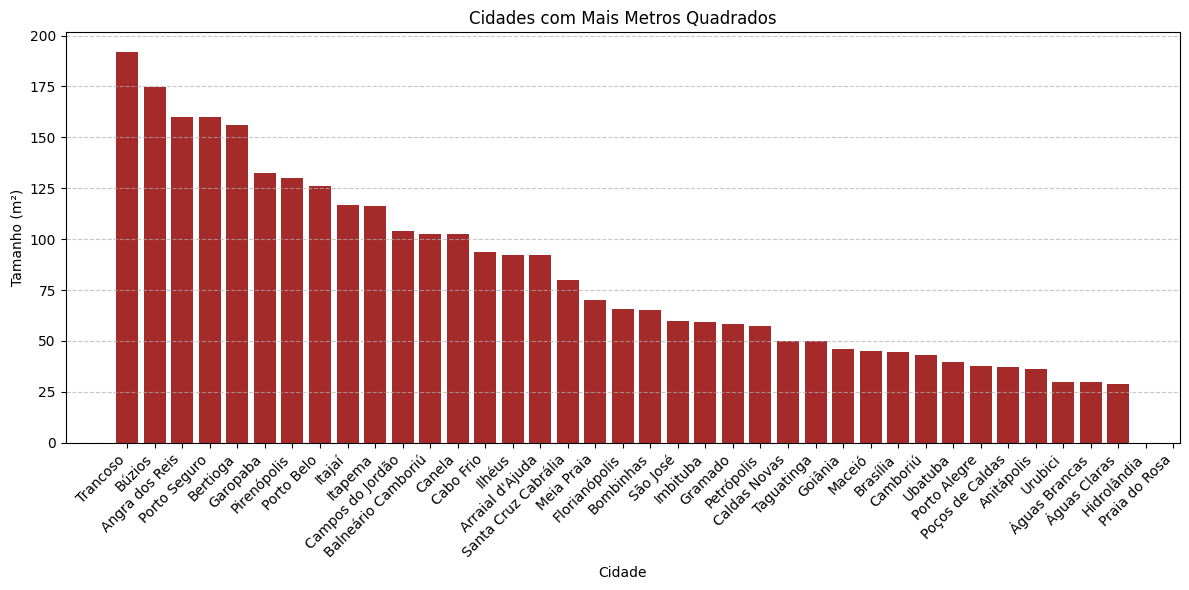

In [229]:
tamanho = imoveis[['city_name', 'room_surface_in_m2']]
tamanho = imoveis[['city_name', 'room_surface_in_m2']].groupby('city_name').mean().reset_index()
tamanho = tamanho.sort_values(by='room_surface_in_m2', ascending=False) 

plt.figure(figsize = (12,6))
plt.bar(tamanho['city_name'], tamanho['room_surface_in_m2'], color='brown')
plt.title('Cidades com Mais Metros Quadrados')
plt.xlabel('Cidade')
plt.ylabel('Tamanho (m²)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#Nao entendi a pergunta, mas penso em fazer a media do room surface de todos os ap da cidade e depois comparar entre as cidades

In [230]:
#Quais cidades têm mais avaliações?

Numero_avaliacoes= imoveis.groupby('city_name')['number_of_ratings'].sum().reset_index()       #Somando todos as avaliações de cada cidade
Numero_avaliacoes = Numero_avaliacoes.sort_values(by='number_of_ratings', ascending=False)     #Ordem crescente 

print(Numero_avaliacoes.head(10))                                                              #Printando o top10 com mais avaliaçoes

             city_name  number_of_ratings
13       Florianópolis              87353
1           Anitápolis               2106
11    Campos do Jordão               1815
5            Bombinhas               1126
15             Goiânia                531
3   Balneário Camboriú                 54
20              Itajaí                 23
21             Itapema                 19
16             Gramado                 15
35             Ubatuba                 15


In [231]:
#Quais cidades têm a maior média de avaliações? E a menor média?

def juntando(linha):
    if pd.notna(linha['number_of_ratings']):                        #Para cada linha da coluna number_of_ratings será verdadeiro caso NÂO for NaN
        linha['Total'] = linha['Total']* linha['number_of_ratings'] #Multiplicando a nota total pelo numero de avaliaçoes
    else:
        linha['Total'] = linha['Total']                             #Caso for FALSO não vai multiplicar nada
    
    return linha                                           
 
avaliacoes = imoveis.apply(juntando, axis=1)                                                                  # Aplicando a função juntando no arquivo
avaliacoes = avaliacoes[['city_name', 'number_of_ratings', 'Total']]
avaliacoes = avaliacoes.groupby('city_name').agg({'Total': 'sum', 'number_of_ratings': 'sum'}).reset_index()  #Somando todas as notas da cidade
avaliacoes['Nota_media'] = avaliacoes['Total']/avaliacoes['number_of_ratings']
avaliacoes['Nota_media'] = avaliacoes['Nota_media'].apply(lambda x: round(x, 2))                              #Deixando com duas casa decimais
avaliacoes = avaliacoes.sort_values(by='Nota_media', ascending=False)

avaliacoes[['city_name','Nota_media']].head(10)

,city_name,Nota_media
0,Angra dos Reis,10.00
6,Brasília,10.00
18,Ilhéus,10.00
27,Porto Belo,9.75
24,Petrópolis,9.62
32,São José,9.50
8,Cabo Frio,9.50
35,Ubatuba,9.47
1,Anitápolis,9.40
14,Garopaba,9.33


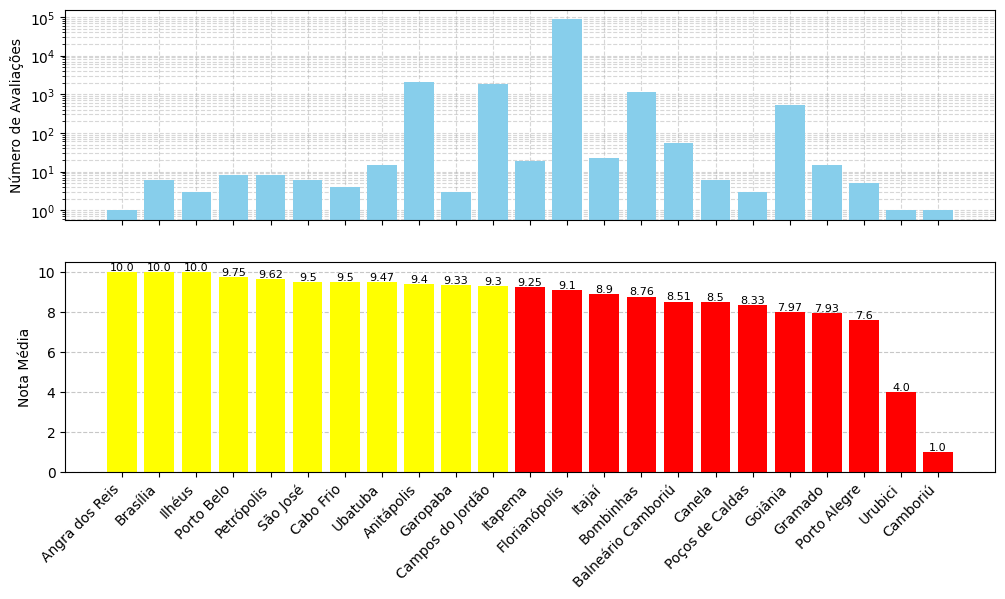

In [232]:
#Plotando o gráfico de numero de avaliações com Nota media

avaliacoes = avaliacoes.head(23)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.bar(avaliacoes['city_name'], avaliacoes['number_of_ratings'], color='skyblue', zorder=2)
ax1.set_ylabel('Número de Avaliações')
ax1.set_yscale('log') 
ax1.grid(True, which='both', linestyle='--', alpha=0.5, zorder=1) 
ax1.set_zorder(3)
ax1.patch.set_visible(False)

separando = len(avaliacoes) // 2                                         #Separando as melhores notas e as piores notas
cor = ['yellow'] * separando + ['red'] * (len(avaliacoes) - separando)
bar2 = ax2.bar(avaliacoes['city_name'], avaliacoes['Nota_media'], color=cor , zorder=2)
ax2.set_ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
ax2.set_zorder(3)
ax2.patch.set_visible(False)

for rect, label in zip(bar2, avaliacoes['Nota_media']):                #Adicionando as notas medias indicadas nas barras para melhor visualização
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', color='black', fontsize=8)

plt.show()

## Existem correlações entre as características de um anúncio e a sua localização?

In [233]:
imoveis['num_room_facilities'] = imoveis['room_facilities'].apply(lambda x: len(x.split(',')))  #Numero de 'facilities' em cada apartamento
imoveis_corr = imoveis
#imoveis_corr                                                                                    #Novo dataframe para analise da correlação

imoveis_city = imoveis[['city_name', 'Localização']].drop_duplicates(subset='city_name')
#imoveis_city                                                                                    #Novo dataframe para pegar as cordenadas das cidades

In [234]:
#Pegando a Loatitude e longitude para CITY_NAME

geolocator = Nominatim(user_agent="myLocation")
#location = geolocator.geocode("Porto Belo")
#location.point

def get_coordinates(city):                         # Função para obter as coordenadas de uma cidade
    location = geolocator.geocode(city)
    if location is not None:
        return location.point
    else:
        return None
imoveis_city['coordinates'] = imoveis_city['city_name'].apply(get_coordinates)

# Cria colunas separadas para latitude e longitude
imoveis_city[['Latitude', 'Longitude']] = imoveis_city['coordinates'].apply(lambda x: pd.Series({'Latitude': x.latitude, 'Longitude': x.longitude}) if x else pd.Series([None, None]))

imoveis_city = imoveis_city.drop('coordinates', axis=1)
imoveis_city = imoveis_city.drop('Localização', axis=1)

#Add os valores de Latitude e Longitude de cada cidade no dataframe de correlação
imoveis_corr = pd.merge(imoveis_corr, imoveis_city[['city_name', 'Latitude', 'Longitude']], on='city_name', how='left')

#imoveis_city            #Dataframe que contem a Latitude e Longitude das Cidades do dataframe original

In [235]:
#Substituindo os valores string para fazer a correlação
imoveis_corr['hotel_name_x'] = pd.Categorical(imoveis['hotel_name_x']).codes    
imoveis_corr['hotel_name_y'] = pd.Categorical(imoveis['hotel_name_x']).codes 
imoveis_corr['accommodation_type'] = pd.Categorical(imoveis['accommodation_type']).codes
imoveis_corr['room_name'] = pd.Categorical(imoveis['room_name']).codes
imoveis_corr['room_facilities'] = pd.Categorical(imoveis['room_facilities']).codes
imoveis_corr['city_name'] = pd.Categorical(imoveis['city_name']).codes
imoveis_corr = imoveis_corr.drop('url', axis=1)

#imoveis_corr        #Dataframe com os valores para fazer correlação (sem strings)

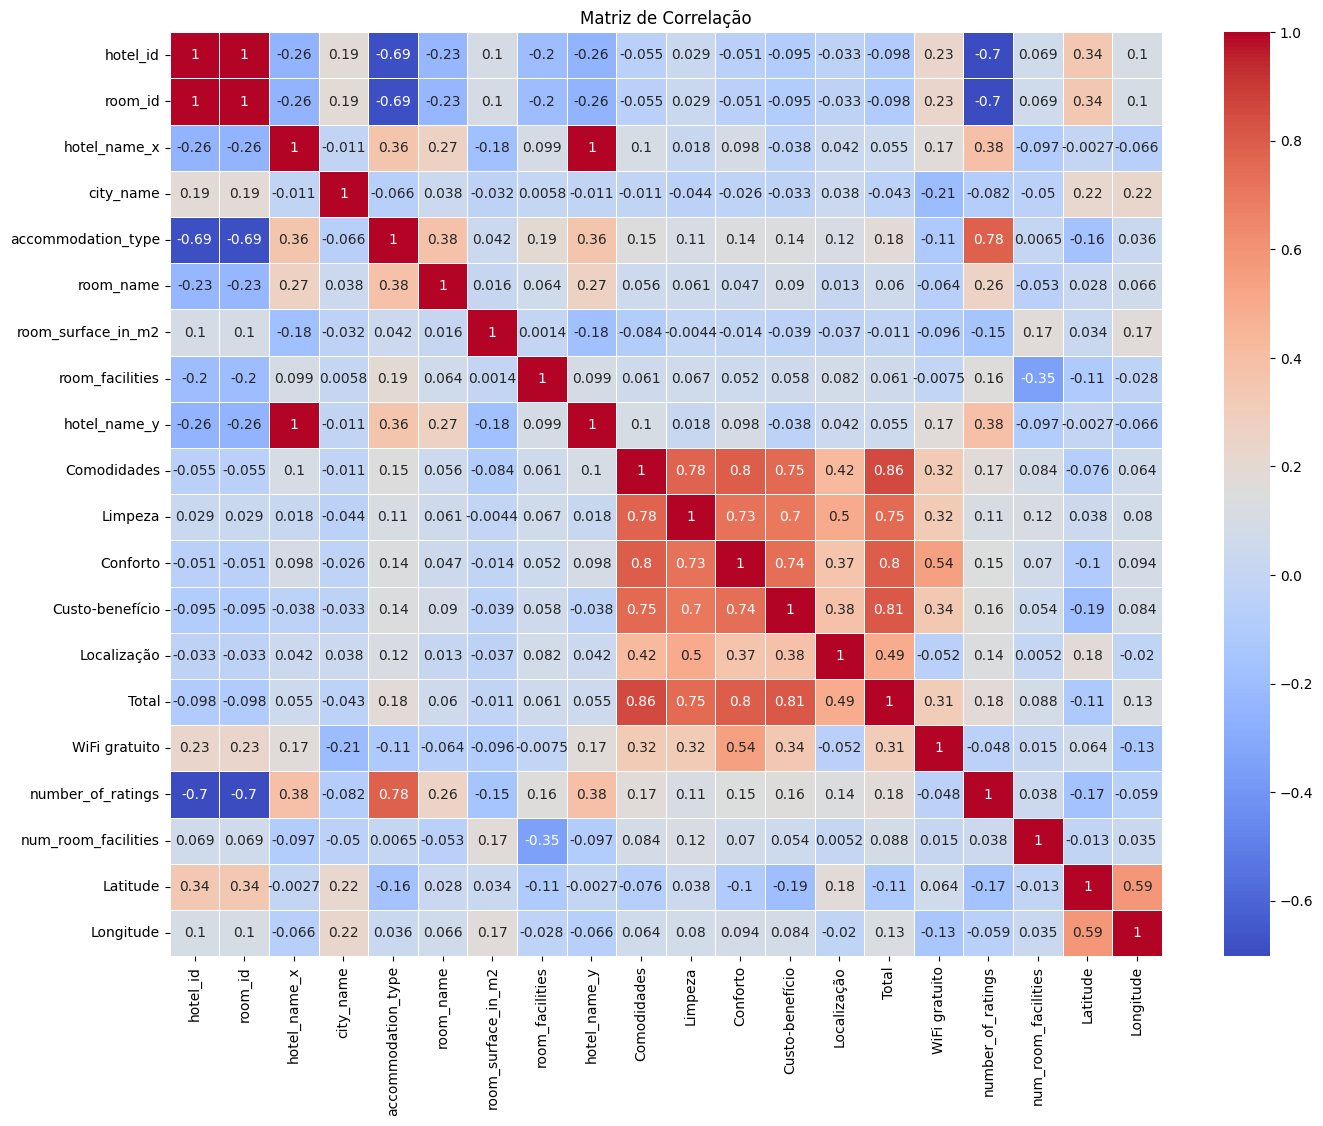

In [236]:
correlation_matrix = imoveis_corr.corr()   # Calcula a matriz de correlação

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

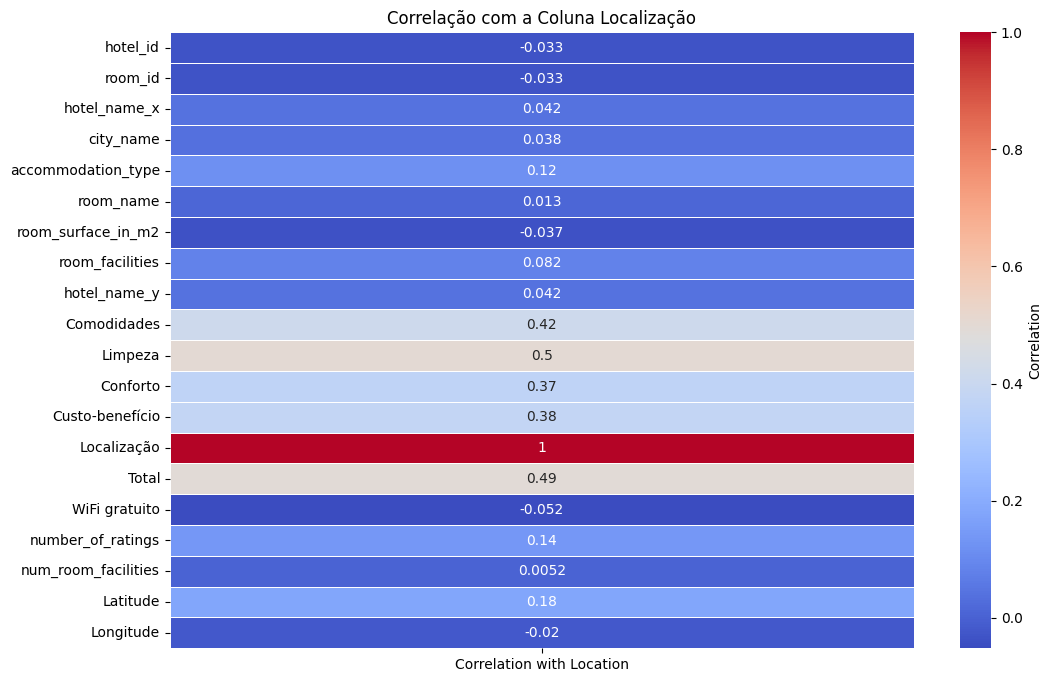

In [237]:
# Calcula as correlações em relação à coluna 'Localização'
correlation_with_location = imoveis_corr.corrwith(imoveis_corr['Localização'])

plt.figure(figsize=(12, 8))
# Converte a série em um DataFrame
correlation_df = pd.DataFrame({'Correlation with Location': correlation_with_location})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Coluna Localização')
plt.show()


## Existem relações entre a nota do anúncio e os recursos disponíveis no imóvel?

In [238]:
todas_facilidades_set = set()                                                                                  #Conjunto para armazenar todas as facilities
 
for facilidades_lista in imoveis['room_facilities']:
    if isinstance(facilidades_lista, str):
        facilidades_lista = facilidades_lista.replace("[", "").replace("]", "").replace("'", "").split(", ")   # Remove caracteres indesejados
        todas_facilidades_set.update(facilidades_lista)
    else:
        todas_facilidades_set.update(facilidades_lista)

todas_facilities = list(todas_facilidades_set)                                                                #Lista com todas as facilities 


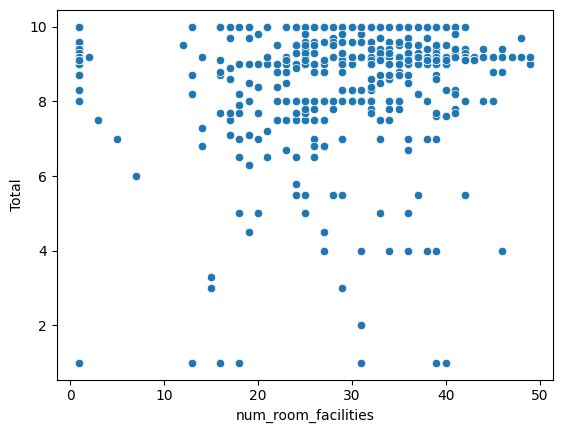

In [239]:
correlation = imoveis_corr[['Total', 'num_room_facilities']].corr()      #Relaçao entre o número de facilities do apartamento com a nota
sns.scatterplot(data=imoveis_corr, y='Total', x='num_room_facilities') 

plt.show()

In [240]:
todas_facilities = todas_facilidades[1:]
#facilidades_all = ['Arara para roupas', 'Closet', 'Andares superiores acessíveis por elevador', 'Flat particular em prédio', 'Álcool gel', 'Máquina de café', 'Roupão', 'A unidade é totalmente acessível para cadeira de rodas', 'Torradeira', 'Mesa de jantar', 'Pia do banheiro rebaixada', 'Utensílios de cozinha', 'Ventilador', 'Frigobar', 'Piscina privativa', 'Acessível por elevador', 'Jacuzzi', 'Banheira de hidromassagem', 'Piso de mármore/azulejo', 'Piscina na cobertura', 'Extintor de incêndio', 'Travesseiro de pena', 'Piscina de borda infinita', 'Vista da cidade', 'Banheiro adicional', 'Sabonete', 'Banheiro compartilhado', 'Chuveiro', 'Detector de fumaça', 'Toda a unidade localizada no térreo', 'Micro-ondas', 'Secador de cabelo', 'Produtos de limpeza', 'Cadeirinha para refeições (crianças)', 'Roupa de cama', 'Área para refeições', 'Comodidades para passar roupa', 'Vista', 'Entrada privativa', 'Internet sem fio (Wi-Fi)', 'Geladeira', 'Cozinha compacta', 'Acessível para pessoas com deficiência auditiva', 'Vista do jardim', 'Terraço', 'Mesa de trabalho', 'Vaso sanitário', 'Roteador wireless', 'Secadora de roupas', 'Vista do lago', 'Tomada perto da cama', 'Serviço de streaming (como Netflix)', 'Varal para secar roupas', 'Aquecimento', 'Telefone', 'Vista do mar', 'Forno', 'Touca de banho', 'Produtos de higiene pessoal gratuitos', 'Varanda', 'Chave de acesso', 'Vista para uma rua tranquila', 'Roupa de cama e banho (custo adicional)', 'Ar-condicionado', 'Armários individuais', 'Internet', 'Fontes de monóxido de carbono', 'Vista de um local de interesse', 'Vista do rio', 'Chinelos', 'Varanda térrea', 'TV', 'Garrafa de água', 'Berço', 'Vista da montanha', 'Piso de madeira ou parquet', 'Toalete compartilhado', 'Vista do pátio interno', 'Sofá', 'Toalhas de piscina', 'Banheira ou chuveiro', 'Lado raso', 'Fogão', 'Isolamento acústico', 'Grades de segurança para bebês', 'Churrasqueira', 'Cesto de lixo', 'Cama dobrável', 'Independente', 'Piscina climatizada', 'Jogos de tabuleiro/quebra-cabeças', 'Lareira', 'Detector de monóxido de carbono', 'Guarda-roupa ou armário', 'Sofá-cama', 'Geminado', 'Condicionador', 'Papel higiênico', 'Piscina de imersão', 'Cozinha', 'Canais a cabo', 'Área de estar', 'Ferro de passar roupa', 'Piscina com vista', 'Andares superiores acessíveis somente por escada', 'Chaleira/cafeteira', 'Computador', 'Área de refeições externa', 'Cofre', 'Toalete adicional', 'Móveis na área externa', 'Banheiro privativo', 'Shampoo', 'Cofre para notebook', 'Área de chuveiro acessível a cadeirantes', 'Cartão de acesso', 'Área de chuveiro ampla', 'Vista da piscina', 'Taças de vinho', 'Banheira', 'Piso com carpete', 'Chaleira elétrica', 'Sauna', 'Canais via satélite', 'Toalhas', 'Máquina de lavar roupas', 'TV de tela plana', 'Travesseiro comum', 'Lava-louças']
imoveis_corr_facilities = imoveis_corr
imoveis_corr_facilities['room_facilities'] = imoveis['room_facilities']
i = 0
novas_colunas = pd.DataFrame()                                 #Dataframe para criar colunas com as facilidades 

for i in todas_facilities:
    # Adiciona uma nova coluna ao DataFrame temporário
    novas_colunas[i] = imoveis_corr_facilities['room_facilities'].apply(lambda x: 1 if i in x else 0)

# Concatena o DataFrame temporário ao DataFrame original
imoveis_corr_facilities = pd.concat([imoveis_corr, novas_colunas], axis=1)
imoveis_corr_facilities = imoveis_corr_facilities.drop('room_facilities', axis=1)

#imoveis_corr

/tmp/ipykernel_47/2324470216.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  novas_colunas[i] = imoveis_corr_facilities['room_facilities'].apply(lambda x: 1 if i in x else 0)
/tmp/ipykernel_47/2324470216.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  novas_colunas[i] = imoveis_corr_facilities['room_facilities'].apply(lambda x: 1 if i in x else 0)
/tmp/ipykernel_47/2324470216.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

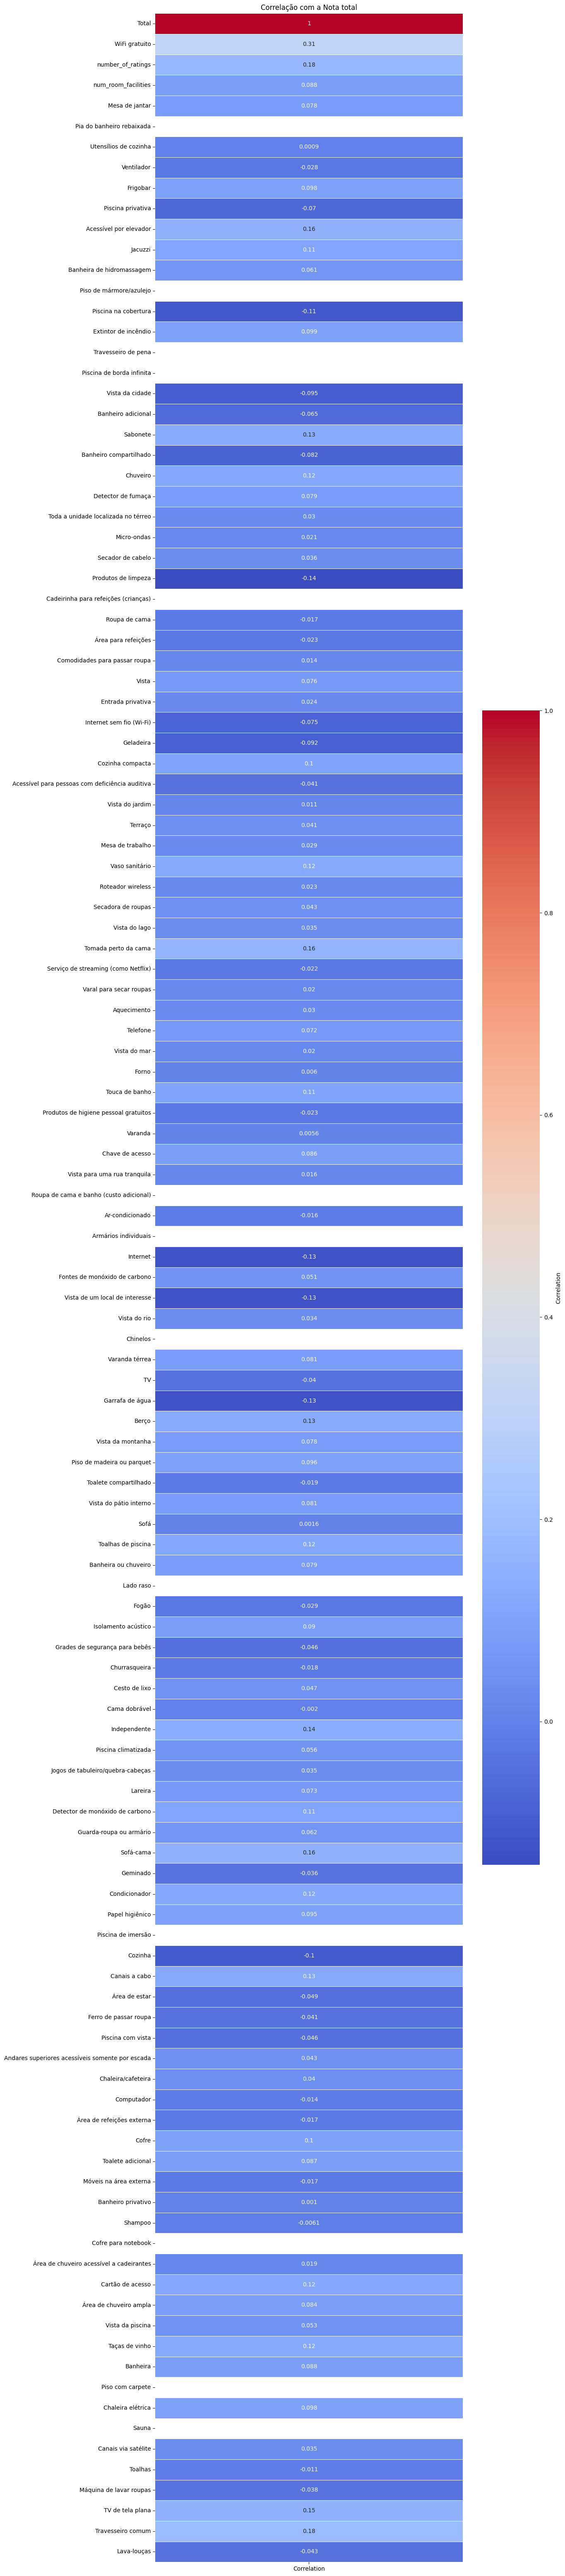

In [242]:
a = ['hotel_id', 'room_id', 'hotel_name_x', 'city_name',
       'accommodation_type', 'room_name', 'room_surface_in_m2', 'hotel_name_y',
       'Comodidades', 'Limpeza', 'Latitude', 'Longitude', 'Conforto', 'Custo-benefício', 'Localização']

imoveis_corr1 = imoveis_corr_facilities.drop(a, axis=1)
# Calcula as correlações em relação à coluna 'Localização'
correlation_notas = imoveis_corr1.corrwith(imoveis_corr1['Total'])

plt.figure(figsize=(12, 80))
# Converte a série em um DataFrame
correlation_df = pd.DataFrame({'Correlation': correlation_notas})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Nota total')
plt.show()

## Existe alguma relação entre a nota recebida e a localização?

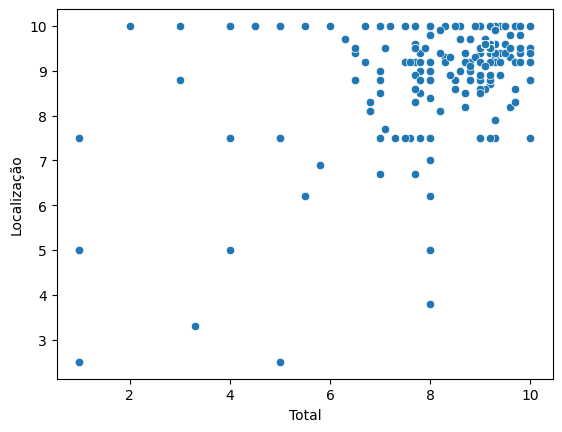

In [245]:
correlation = imoveis_corr[['Total', 'Localização']].corr()      #Relaçao entre o número de facilities do apartamento com a nota
#sns.scatterplot(data=imoveis_corr, y='Total', x='Localização') 
sns.scatterplot(data=imoveis_corr, y='Localização', x='Total')

plt.show()

## O que você pode inferir sobre as notas dos imóveis?